In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

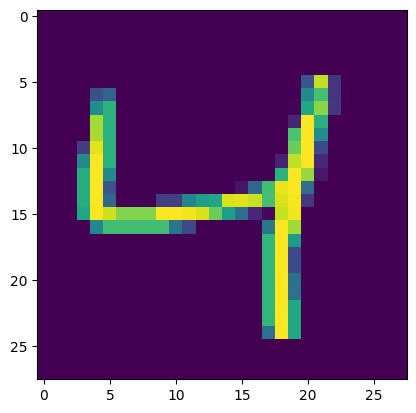

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

## Now divide each pixel with 255 to get accurate and fast results of `weights` 

In [15]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

- The given input is `2d` we have to flatten in to convert it into `1d`
- The `Flatten` method in tenseorflow is used to bring rows side by side.
- 'Flatten` converts higher dimensional data into `1d`.

Eg.

Given input is 28*28

              - 28 rows and 28 columns
When we use `Flatten` it converts rows and columns into single value i.e
`28*28 = 784`

In [30]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam')

In [41]:
history = model.fit(X_train,y_train,epochs = 25,validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0096 - val_loss: 0.1757
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0073 - val_loss: 0.1725
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0086 - val_loss: 0.1682
Epoch 4/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0061 - val_loss: 0.1892
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0117 - val_loss: 0.1812
Epoch 6/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0073 - val_loss: 0.1712
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0066 - val_loss: 0.1795
Epoch 8/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0077 - val_loss: 0.1999
Epoch 9/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0059 - val_loss: 0.2070
Epoch 10/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.00

In [42]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [43]:
y_pred = y_prob.argmax(axis = 1)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9809

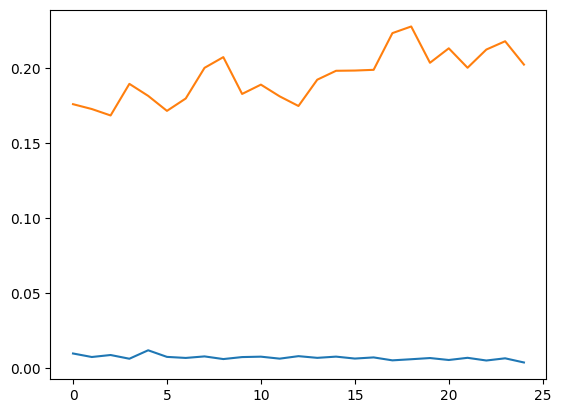

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [47]:
history.history

{'loss': [0.009598016738891602,
  0.007257132790982723,
  0.008580993860960007,
  0.006104324944317341,
  0.011731773614883423,
  0.007329855114221573,
  0.006635897792875767,
  0.007652199361473322,
  0.005880948156118393,
  0.007205863483250141,
  0.007479384075850248,
  0.006156647577881813,
  0.007820403203368187,
  0.006691309157758951,
  0.007504675537347794,
  0.006216663401573896,
  0.006981916259974241,
  0.005026218947023153,
  0.00576791213825345,
  0.0065657696686685085,
  0.005262769293040037,
  0.006713254377245903,
  0.004923920147120953,
  0.006385253742337227,
  0.003608071943745017],
 'val_loss': [0.17568786442279816,
  0.1724545657634735,
  0.16816911101341248,
  0.18922746181488037,
  0.18122217059135437,
  0.17122788727283478,
  0.17948123812675476,
  0.19989928603172302,
  0.20703282952308655,
  0.1825072169303894,
  0.18871034681797028,
  0.18089522421360016,
  0.17447751760482788,
  0.1920027881860733,
  0.19793404638767242,
  0.1980905830860138,
  0.19857531785

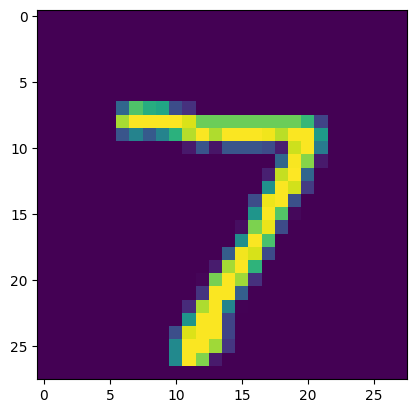

In [49]:
plt.imshow(X_test[0])

In [53]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 87ms/step


array([7])

In [54]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 23ms/step


array([0])